In [1]:
%pylab inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


# Example Data


각 학생별 퀴즈를 풀기위해 투입한 시간대비, 퀴즈성적은 다음과 같습니다.

| 학생 | 공부한 시간 | 퀴즈 점수 | 
|:----|:----------|:--------|
| 창민 | 5         | 66 |
| 윤서 | 15        | 87 |
| 정아 | 25        | 90 |

# Regression Model

$$ y_i = \beta_{const} + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_k x_k + e_i $$
 
 
예를 들어 학생별 공부한 시간대비 퀴즈 성적표를 데이터로 쓴다면 다음과 같습니다.

 * $ \hat{y} $ : 퀴즈 점수
 * $ x $ : 공부한 시간 
 * $ e_i $ : error term
 * $ \beta_{const} $ : y-intercept를 나타내며, 학생이 수업에 나오기만 해도 주는 점수라고 보면 됩니다.
 * $ \beta_i $ : 각 학생이 공부한 시간에 따른 추가적인 점수
 

### Error Term

Error Term은 random influences를 나타냅니다. <br>
$$ \begin{align}
e &= y -  \hat{y}    \\
y &= \hat{y} + e 
\end{align} $$




# Least Squares Estimation

일단 y값은 데이터이기 때문에 어떤 값인지 알고 있지만, parameters $ \beta $ 값들은 모르기 때문에, 알기 위해서는 어떠한 방법으로 estimate해줘야 합니다.<br>
가장 흔하게 쓰이는 방법은 SSE (Sum of the Squared Error)입니다.

$$ SSE = \sum^N_{i=1} e^2_i = \sum^N_{i=1} (y_i - \hat{y}_i)^2 $$


Least sqaures estimation을 calculus로 미분하면 다음과 같은 결과가 나옵니다.

$$ \hat{\beta}_1=\frac{ \sum_{i=1}^{N}(y_i-\bar{y})(x_i-\bar{x})}{\sum_{i=1}^{N}(x_i-\bar{x})^2} $$ 

그리고.. 

$$ \hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x} $$ 


Derivation하는 방법은 다음의 문서를 참고합니다.
* [Simple Linear Regression Least Squares Estimates of β0 and β1](https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf)
* [The Mathematical Derivation of Least Squares](https://isites.harvard.edu/fs/docs/icb.topic515975.files/OLSDerivation.pdf)

## Data

In [2]:
data = np.loadtxt('ex1data1.csv', delimiter=',')
scaler = StandardScaler()
data = scaler.fit_transform(data)

Text(0, 0.5, 'Profit in $10,000s')

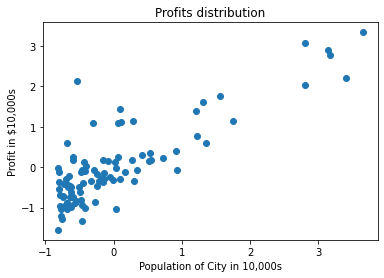

In [3]:
scatter(data[:, 0], data[:, 1])
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')

## Numpy Code

In [4]:
def least_square_estimate(x, y):
    x_mean, y_mean = x.mean(), y.mean()
    w = np.zeros(2)
    
    w[1] = np.sum((y - y_mean) * (x - x_mean))/ np.sum((x - x_mean)**2)
    w[0] = y_mean - w[1] * x_mean
    return w

def ls_predict(w, x):
    return w[0] + w[1:].dot([x])

def visualize(B, x, y_true, y_pred):
    print('bias:', B[0])
    print('beta:', B[1])
    
    scatter(x, y_true)
    plot(x, y_pred, color='red')

w = least_square_estimate(data[:, 0], data[:, 1])

bias: 8.460986092809687e-16
beta: 0.8378732325263409


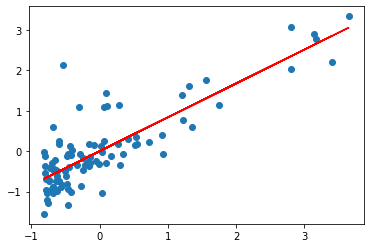

In [5]:
y_pred = ls_predict(w, data[:, 0])
visualize(w, data[:, 0], data[:, 1], y_pred)

##  Numpy - Using Matrix

In [6]:
def least_square_with_matrix(x, y):
    x = sm.add_constant(x)
    
    a = np.linalg.inv(x.T @ x)
    b = x.T @ y
    B = a @ b
    return B

def predict(B, x):
    x = sm.add_constant(x)
    return x @ B

w = least_square_estimate(data[:, 0], data[:, 1])

bias: 8.460986092809687e-16
beta: 0.8378732325263409


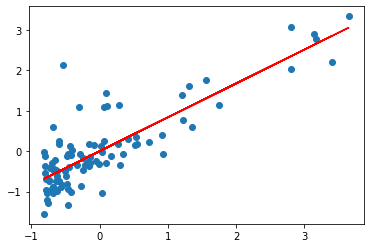

In [7]:
y_pred = ls_predict(w, data[:, 0])
visualize(w, data[:, 0], data[:, 1], y_pred)

## Numpy - Using Linalg

bias: 8.460986092809687e-16
beta: 0.8378732325263409


<ipython-input-8-b38473de6076>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(


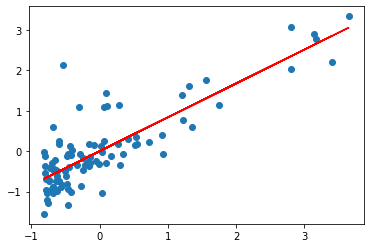

In [8]:
B = np.linalg.lstsq(
        sm.add_constant(data[:, 0].reshape(-1, 1)),
        data[:, 1].reshape(-1, 1), )[0]

visualize(w, data[:, 0], data[:, 1], y_pred)

## Statsmodels OLS

In [9]:
ols = sm.OLS(data[:, 1], sm.add_constant(data[:, 0]))

ols = ols.fit()
display(ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           1.02e-26
Time:                        16:57:56   Log-Likelihood:                -78.915
No. Observations:                  97   AIC:                             161.8
Df Residuals:                      95   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.053e-16      0.056   5.45e-15      1.000      -0.111       0.111
x1             0.8379      0.056     14.961      0.000       0.727       0.949
==============================================================================
Omnibus:                       39.986   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.142
Skew:                           1.455   Prob(JB):                     3.29e-24
Kurtosis:                       7.276   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

bias: 3.0531133177191805e-16
beta: 0.8378732325263407


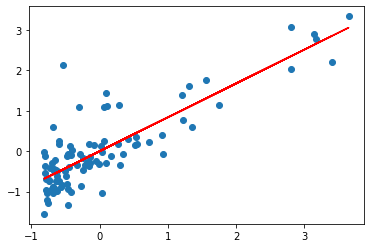

In [10]:
y_pred = ols.predict(sm.add_constant(data[:, 0]))
visualize(ols.params, data[:, 0], data[:, 1], y_pred)

# Multiple Regression with Matrix (Least Squares Estimation)

 * [The Multiple Regression](https://isites.harvard.edu/fs/docs/icb.topic515975.files/OLSDerivation.pdf) 중간부분..
 * [참고](https://onlinecourses.science.psu.edu/stat501/node/382)


오직 한개의 independent variable을 갖고서 예측하는 일은 사실.. 매우 드뭅니다. <br>
일반적으로 여러개의 independent variables을 갖고서 한개의 dependent variable을 예측을 하게 됩니다.<br>
Matrix를 사용한 아주 기본적인 (위의 공식) OLS Regression equation 은 다음과 같습니다.

$$ \begin{bmatrix} y_1 \\ y_2 \\ ... \\ y_n \end{bmatrix} = 
\begin{bmatrix} 1 & x_11 & ... & x_1k \\ 1 & x_21 & ... & x_2k \\ ... & ... & ... & ... \\ 1 & x_n1 & ... & x_nk \end{bmatrix}
\begin{bmatrix} \beta_1 \\ \beta_0 \\ ... \\ \beta_k \end{bmatrix} + 
\begin{bmatrix} e_1 \\ e_0 \\ ... \\ e_k \end{bmatrix}
$$

위의 Matrix로 표현될부분을 linear algebra로 다음과 같이 표현될 수 있습니다. 


$$ \mathbf{Y} = \mathbf{X} \mathbf{B} + \mathbf{e} $$

* $ \mathbf{Y} $: N x 1 형태
* $ \mathbf{X} $: N x (k + 1) 형태이며, 첫번째 컬럼은 1로만 구성
* $ \mathbf{B} $: (k + 1) x 1 형태이며, regression constant와 coefficients를 갖고 있음
* $ \mathbf{e} $ : N x 1 형태이며, 예측 에러값을 포함

### Sum of the Squared Estimation with Matrix

다음의 loss값을 최소로하는 $ \mathbf{B} $ 를 찾는것이 목표입니다.<br>
SSE는 모든 에러값의 제곱의 합이라고 보면 됩니다. 따라서 $ \mathbf{e} $ 를 제곱한것의 합이기 때문에 다음과 같습니다.

$$ SSE = \sum E^2_i = \mathbf{e}^{\prime} \mathbf{e} $$

SSE의 중요한 점은 오른쪽 수식을 풀었을때의 답은 scalar값이 나옵니다. <br>
$ \mathbf{B} $ matrix에 관하여 SSE의 미분을 구하고자 한다면 먼저 $ \mathbf{e} $의 값을 풀어써야 합니다.

$$ \mathbf{e} = \mathbf{Y} - \mathbf{X}\mathbf{B} $$ 

여기서 SSE의 오른쪽 공식에 대입하면 다음과 같이 됩니다.

$$ SSE = (\mathbf{Y} - \mathbf{X}\mathbf{B})^{\prime} (\mathbf{Y} - \mathbf{X}\mathbf{B}) $$

transposition $ \prime $ 은 아래와 같이 distribute될 수 있습니다.

$$ \begin{align}
SSE &= (\mathbf{Y}^{\prime} - \mathbf{B}^{\prime}\mathbf{X}^{\prime}) (\mathbf{Y} - \mathbf{X}\mathbf{B}) \\
    &= \mathbf{Y}^{\prime}\mathbf{Y} - 
          \mathbf{Y}^{\prime} \mathbf{X} \mathbf{B} - 
          \mathbf{B}^{\prime} \mathbf{X}^{\prime} \mathbf{Y} +
          \mathbf{B}^{\prime}\mathbf{X}^{\prime} \mathbf{X}\mathbf{B}
\end{align} $$ 

여기서 중간의 2개의 terms $ \mathbf{Y}^{\prime} \mathbf{X} \mathbf{B} $  그리고 $ \mathbf{B}^{\prime} \mathbf{X}^{\prime} \mathbf{Y} $ 은 동일한 scalar값을 각각 내놓습니다. <br>
scalar값을 내놓은 다는것은 transpose를 해도 동일하다는 뜻입니다. (1 x 1 매트릭스같을수도 있겠죠)<br>
즉.. $ \mathbf{Y}^{\prime} \mathbf{X} \mathbf{B} = \mathbf{B}^{\prime} \mathbf{X}^{\prime} \mathbf{Y} $
는 transpose를 한쪽에 하면 동일해지기 때문에 이런 공식으로 쓸수 있습니다.


$$ SSE = \mathbf{Y}^{\prime}\mathbf{Y}  -
         2 \mathbf{Y}^{\prime} \mathbf{X} \mathbf{B} + 
         \mathbf{B}^{\prime} \mathbf{X}^{\prime} \mathbf{X} \mathbf{B}
$$


### Derivative of SSE

$$ \frac{\partial SSE}{\partial \mathbf{B}} = \frac{\partial}{\partial \mathbf{B}}
         ( \mathbf{Y}^{\prime}\mathbf{Y}  -
         2 \mathbf{Y}^{\prime} \mathbf{X} \mathbf{B} + 
         \mathbf{B}^{\prime} \mathbf{X}^{\prime} \mathbf{X} \mathbf{B})
$$ 

일단 $ \mathbf{B} $를 제외한 모든 matrix들은 모두 상수로 여깁니다. $ \left( \frac{d}{dx}c = 0 \right) $ <br>
따라서 첫번째 구문 $ \mathbf{Y}^{\prime}\mathbf{Y} $ 그냥 0이 됩니다.

중간부분 $ - 2 \mathbf{Y}^{\prime} \mathbf{X} \mathbf{B} $ 에서 $ \mathbf{B} $는 없어지고, 나머지 남아있는 matrix에 transpose를 해주면 됩니다. <br>
따라서 $ -2 \mathbf{X}^{\prime} \mathbf{Y} $ 가 됩니다.


$$ \frac{\partial SSE}{\partial \mathbf{B}} = -2 \mathbf{X}^{\prime} \mathbf{Y} + 
    2 \mathbf{X}^{\prime} \mathbf{X} \mathbf{B} $$
    
    
그 다음 해줄것은 위에서 구한 식을 0값으로 놓고, $ \mathbf{B} $ 를 구하는 것입니다.

$$ \begin{align}
0 &= - 2 \mathbf{X}^{\prime} \mathbf{Y} +2 \mathbf{X}^{\prime} \mathbf{X} \mathbf{B} & [0] \\
 -2 \mathbf{X}^{\prime} \mathbf{X} \mathbf{B} &= -2 \mathbf{X}^{\prime} \mathbf{Y} & [1] \\
 \mathbf{X}^{\prime} \mathbf{X} \mathbf{B} &= \mathbf{X}^{\prime} \mathbf{Y} & [2] \\
 \mathbf{B} &= (\mathbf{X}^{\prime} \mathbf{X})^{-1} \mathbf{X}^{\prime} \mathbf{Y} & [3]
\end{align} $$

* [1]: 양변을 $ -2 \mathbf{X}^{\prime} \mathbf{X} \mathbf{B} $ 으로 뺌
* [2]: 양변을 -2 로 나눠줌
* [3]: 양변을 $ \mathbf{X}^{\prime} \mathbf{X} $ 의 inverse인 $ (\mathbf{X}^{\prime} \mathbf{X})^{-1} $ 로 곱해줍니다.  즉 양변을 $ \mathbf{X}^{\prime} \mathbf{X} $ 으로 나누는 것과 동일합니다.

## Data

In [11]:
data = pd.read_csv('../../data/insurance/insurance.csv')
data = pd.get_dummies(data)
display(data.head())

# Split X and Y
data_x = data.loc[:, data.columns!= 'expenses'].as_matrix()
data_y = data['expenses'].as_matrix().reshape((-1, 1))

# Scaling 
scaler = StandardScaler()
data_x = scaler.fit_transform(data_x)
data_y = scaler.fit_transform(data_y)

print('train:', data_x.shape)
print('test:', data_y.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/insurance/insurance.csv'

## Numpy Code

In [ ]:
def least_square_with_matrix(x, y):
    x = sm.add_constant(x)
    
    a = np.linalg.inv(x.T @ x)
    b = x.T @ y
    B = a @ b
    return B

def predict(B, x):
    x = sm.add_constant(x)
    return x @ B

def visualize(y_true, y_pred):
    x = np.arange(y_true.shape[0])
    scatter(x, y_true, alpha=0.7)
    scatter(x, y_pred, color='red', alpha=0.3)
    print('MSE:', mean_squared_error(y_true, y_pred))

B = least_square_with_matrix(data_x, data_y)
y_pred = predict(B, data_x)
visualize(data_y, y_pred)

## Numpy Code - lstsq

In [ ]:
B = np.linalg.lstsq(sm.add_constant(data_x), data_y)[0]
y_pred = predict(B, data_x)
visualize(data_y, y_pred)

## Statsmodels Code

In [ ]:
import statsmodels.api as sm

ols = sm.OLS(data_y, sm.add_constant(data_x))
res = ols.fit(method='pinv')
res.summary()

In [ ]:
y_pred = res.predict(sm.add_constant(data_x))

visualize(data_y, y_pred)

# References

* [Chapter 5: Ordinary Least Squares](http://www.openaccesstexts.org/pdf/Quant_Chapter_05_ols.pdf)
* [Chapter 1: Linear Algebra](http://www.openaccesstexts.org/pdf/Quant_Chapter_01_linear.pdf)
* [Ordinary Least Squares Estimation Procedure ](http://www3.amherst.edu/~fwesthoff/webpost/Old/Econ_360/Econ_360-09-24-Chap.pdf)